In [38]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
data=pd.read_csv('Data/medical_insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

#make a column transformer
ct= make_column_transformer(
    [MinMaxScaler]
)

In [41]:
#creating features and labels
X=encoded_data.drop('charges', axis=1)
y=encoded_data['charges']
X.head(), y.head()

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [43]:
len(X),len(X_train),len(X_test)

(1338, 936, 402)

In [44]:
len(y),len(y_train),len(y_test)

(1338, 936, 402)

In [45]:
#create a model
tf.random.set_seed(100)
model_1=tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(10))
model_1.add(tf.keras.layers.Dense(1))

In [46]:
#compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [47]:
#fit the model
model_1.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
30/30 [==============================] - 6s 11ms/step - loss: 8481.7285 - mae: 8481.7285
Epoch 2/1000
30/30 [==============================] - 0s 13ms/step - loss: 7616.0977 - mae: 7616.0977
Epoch 3/1000
30/30 [==============================] - 1s 18ms/step - loss: 7344.5581 - mae: 7344.5581
Epoch 4/1000
30/30 [==============================] - 0s 9ms/step - loss: 7609.8413 - mae: 7609.8413
Epoch 5/1000
30/30 [==============================] - 0s 16ms/step - loss: 7617.6772 - mae: 7617.6772
Epoch 6/1000
30/30 [==============================] - 0s 17ms/step - loss: 7641.7290 - mae: 7641.7290
Epoch 7/1000
30/30 [==============================] - 1s 18ms/step - loss: 7697.9521 - mae: 7697.9521
Epoch 8/1000
30/30 [==============================] - 1s 25ms/step - loss: 7749.4937 - mae: 7749.4937
Epoch 9/1000
30/30 [==============================] - 1s 23ms/step - loss: 7586.5435 - mae: 7586.5435
Epoch 10/1000
30/30 [==============================] - 1s 19ms/step - loss: 7690.87

In [48]:
model_1.evaluate(X_test,y_test)

13/13 [==============================] - 33s 7ms/step - loss: 5345.9492 - mae: 5345.9492


[5345.94921875, 5345.94921875]

In [49]:
y_pred_1=model_1.predict(X_test)
y_pred_1

13/13 [==============================] - 0s 6ms/step


array([[  773.0075  ],
       [ 1646.1469  ],
       [ 4180.6025  ],
       [  107.58588 ],
       [16847.143   ],
       [26082.883   ],
       [ 9174.347   ],
       [ 1015.3906  ],
       [20422.652   ],
       [ 9236.869   ],
       [ 8467.617   ],
       [ 1711.1438  ],
       [ 6631.533   ],
       [ 1567.3032  ],
       [ 4940.3105  ],
       [21152.021   ],
       [ 6763.5957  ],
       [ 7966.1777  ],
       [ 3019.662   ],
       [10375.84    ],
       [ 8090.2837  ],
       [ -139.49907 ],
       [ 3414.2285  ],
       [22477.404   ],
       [ 7974.423   ],
       [21912.777   ],
       [ 2919.551   ],
       [27547.348   ],
       [22026.676   ],
       [ 8130.2793  ],
       [11301.848   ],
       [  276.7138  ],
       [27213.535   ],
       [17877.947   ],
       [ 4407.7803  ],
       [ 7499.6904  ],
       [ 3755.7705  ],
       [22503.793   ],
       [ 1744.4979  ],
       [26938.025   ],
       [ 4028.775   ],
       [ 7076.465   ],
       [ 1853.856   ],
       [ 40

In [50]:
tf.metrics.MAE(y_test,y_pred_1)

<tf.Tensor: shape=(402,), dtype=float32, numpy=
array([12733.033 , 11875.044 ,  9979.66  , 13398.456 , 10490.694 ,
       16239.373 ,  8344.693 , 12490.651 , 12487.74  ,  8341.447 ,
        8413.746 , 11814.267 ,  8848.006 , 11950.379 ,  9550.876 ,
       12937.919 ,  8805.226 ,  8495.615 , 10750.434 ,  8346.985 ,
        8472.172 , 13645.542 , 10474.929 , 13798.874 ,  8494.015 ,
       13426.415 , 10822.156 , 17300.117 , 13501.215 ,  8465.277 ,
        8431.989 , 13229.327 , 17055.945 , 11021.283 ,  9842.754 ,
        8592.955 , 10249.149 , 13816.335 , 11783.321 , 16855.824 ,
       10073.622 ,  8707.402 , 11683.398 , 10040.291 , 14205.522 ,
       11491.341 , 11321.259 , 12779.869 , 13176.2   ,  9304.29  ,
        8335.685 , 10190.615 , 10763.455 ,  9422.99  , 10379.534 ,
        8496.287 ,  8606.957 , 13114.612 ,  9878.97  ,  8654.838 ,
       12784.77  , 12581.797 , 11078.332 ,  9263.516 ,  8365.358 ,
       13383.177 , 14011.3125, 10303.077 ,  9139.338 , 15114.374 ,
        9333.2

In [51]:
#building another model
model_2=tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(100))
model_2.add(tf.keras.layers.Dense(10))
model_2.add(tf.keras.layers.Dense(1))

In [52]:
#compiling the second model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
                metrics=['mae'])

In [53]:
#fitting the model
model_2.fit(X_train,y_train,epochs=500)

Epoch 1/500
30/30 [==============================] - 2s 6ms/step - loss: 13145.8545 - mae: 13145.8545
Epoch 2/500
30/30 [==============================] - 0s 7ms/step - loss: 13115.5869 - mae: 13115.5869
Epoch 3/500
30/30 [==============================] - 0s 5ms/step - loss: 13079.5771 - mae: 13079.5771
Epoch 4/500
30/30 [==============================] - 0s 5ms/step - loss: 13034.5020 - mae: 13034.5020
Epoch 5/500
30/30 [==============================] - 0s 5ms/step - loss: 12977.0918 - mae: 12977.0918
Epoch 6/500
30/30 [==============================] - 0s 7ms/step - loss: 12904.7637 - mae: 12904.7637
Epoch 7/500
30/30 [==============================] - 0s 6ms/step - loss: 12814.2139 - mae: 12814.2139
Epoch 8/500
30/30 [==============================] - 0s 7ms/step - loss: 12701.7822 - mae: 12701.7822
Epoch 9/500
30/30 [==============================] - 0s 6ms/step - loss: 12564.4424 - mae: 12564.4424
Epoch 10/500
30/30 [==============================] - 0s 6ms/step - loss: 12398.61

In [54]:
model_2.evaluate(X_test,y_test)

13/13 [==============================] - 1s 6ms/step - loss: 3569.9229 - mae: 3569.9229


[3569.9228515625, 3569.9228515625]

In [55]:
y_pred_2=model_2.predict(X_test)
y_pred_2

13/13 [==============================] - 1s 10ms/step


array([[ 1.68643176e+03],
       [ 3.81237842e+03],
       [ 7.76848242e+03],
       [ 1.13180579e+03],
       [ 1.67280215e+04],
       [ 2.98151074e+04],
       [ 1.30992393e+04],
       [ 2.27729883e+03],
       [ 2.12030605e+04],
       [ 1.31043467e+04],
       [ 1.02907520e+04],
       [ 3.09485059e+03],
       [ 9.43651855e+03],
       [ 2.87472607e+03],
       [ 7.77473877e+03],
       [ 2.14569863e+04],
       [ 1.04271025e+04],
       [ 1.15706807e+04],
       [ 5.06611865e+03],
       [ 1.29613867e+04],
       [ 1.09804189e+04],
       [ 7.83551392e+02],
       [ 6.89114502e+03],
       [ 2.42645293e+04],
       [ 1.16768516e+04],
       [ 2.26672109e+04],
       [ 4.21776074e+03],
       [ 3.07060059e+04],
       [ 2.45514883e+04],
       [ 1.24779160e+04],
       [ 1.40952881e+04],
       [ 1.78775891e+03],
       [ 3.01986738e+04],
       [ 1.74325996e+04],
       [ 6.88190625e+03],
       [ 1.23651846e+04],
       [ 4.69721826e+03],
       [ 2.34155859e+04],
       [ 3.6

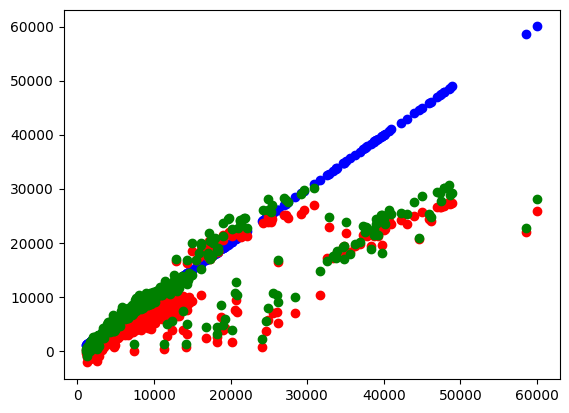

In [61]:
plt.scatter(y_test,y_test, c='b')
plt.scatter(y_test,y_pred_1, c='r')
plt.scatter(y_test,y_pred_2, c='g')